Analysis of UK Car Accidents 2005-2015 dataset released by department of transport

There are endless questions to be answered but after going through the data there are some questions that need to answered such as?
1) What are the age group are most likely to be involved in accidents?
2) What are the areas with higher accident severity or lower accident severity?
3) What are the areas with most frequent accidents?

and so on


In [68]:
# we will start with importing data and cleaning the data 
# there are 3 files that need to imported namely accident, casualities and vehicles.
# importing liibraries

import os
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'



In [51]:
current_directory = os.getcwd()
accidents = pd.read_csv( current_directory + '/data/Accidents0515.csv',index_col='Accident_Index')
casualties=pd.read_csv(current_directory +'/data/Casualties0515.csv' , error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)
vehicles=pd.read_csv(current_directory + '/data/Vehicles0515.csv', error_bad_lines=False,index_col='Accident_Index',warn_bad_lines=False)

In [52]:
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


In [54]:
# listing columns 
accidents.columns.values

array(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date',
       'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carri

In [ ]:
accidents = accidents.join(vehicles, how='outer')

In [56]:
#dropping columns 
accidents = accidents.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude',
               'Police_Force', 'Local_Authority_(District)',
               'Local_Authority_(Highway)', 'LSOA_of_Accident_Location',
               '1st_Road_Number', '2nd_Road_Number' ], axis=1)

accidents.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,2,1,1,04/01/2005,3,17:42,3,6,30,0,...,1.0,15.0,2.0,74.0,10.0,-1.0,-1.0,-1.0,7.0,1.0
200501BS00002,3,1,1,05/01/2005,4,17:36,4,3,30,6,...,1.0,1.0,1.0,42.0,7.0,8268.0,2.0,3.0,-1.0,-1.0
200501BS00003,3,2,1,06/01/2005,5,00:15,5,6,30,0,...,1.0,1.0,1.0,35.0,6.0,8300.0,2.0,5.0,2.0,1.0
200501BS00003,3,2,1,06/01/2005,5,00:15,5,6,30,0,...,1.0,15.0,1.0,62.0,9.0,1762.0,1.0,6.0,1.0,1.0
200501BS00004,3,1,1,07/01/2005,6,10:35,3,6,30,0,...,1.0,15.0,2.0,49.0,8.0,1769.0,1.0,4.0,2.0,1.0


In [59]:
#combining date and time columns records
accidents['Date_time'] =  accidents['Date'] +' '+ accidents['Time']

for col in accidents.columns:
    accidents = (accidents[accidents[col]!=-1])
    #print(col ,' ' , x)
for col in casualties.columns:
    casualties = (casualties[casualties[col]!=-1])

    accidents['Date_time'] = pd.to_datetime(accidents.Date_time)
accidents.drop(['Date','Time'],axis =1 , inplace=True)
accidents.dropna(inplace=True)

We will start with Data Visualization

Before finding driver age involved in accidents, we will find following

1) Find day of week during which max accidents has occured

2)Find hour of day during which max accidents has occured

3)Finally, we can age of driver

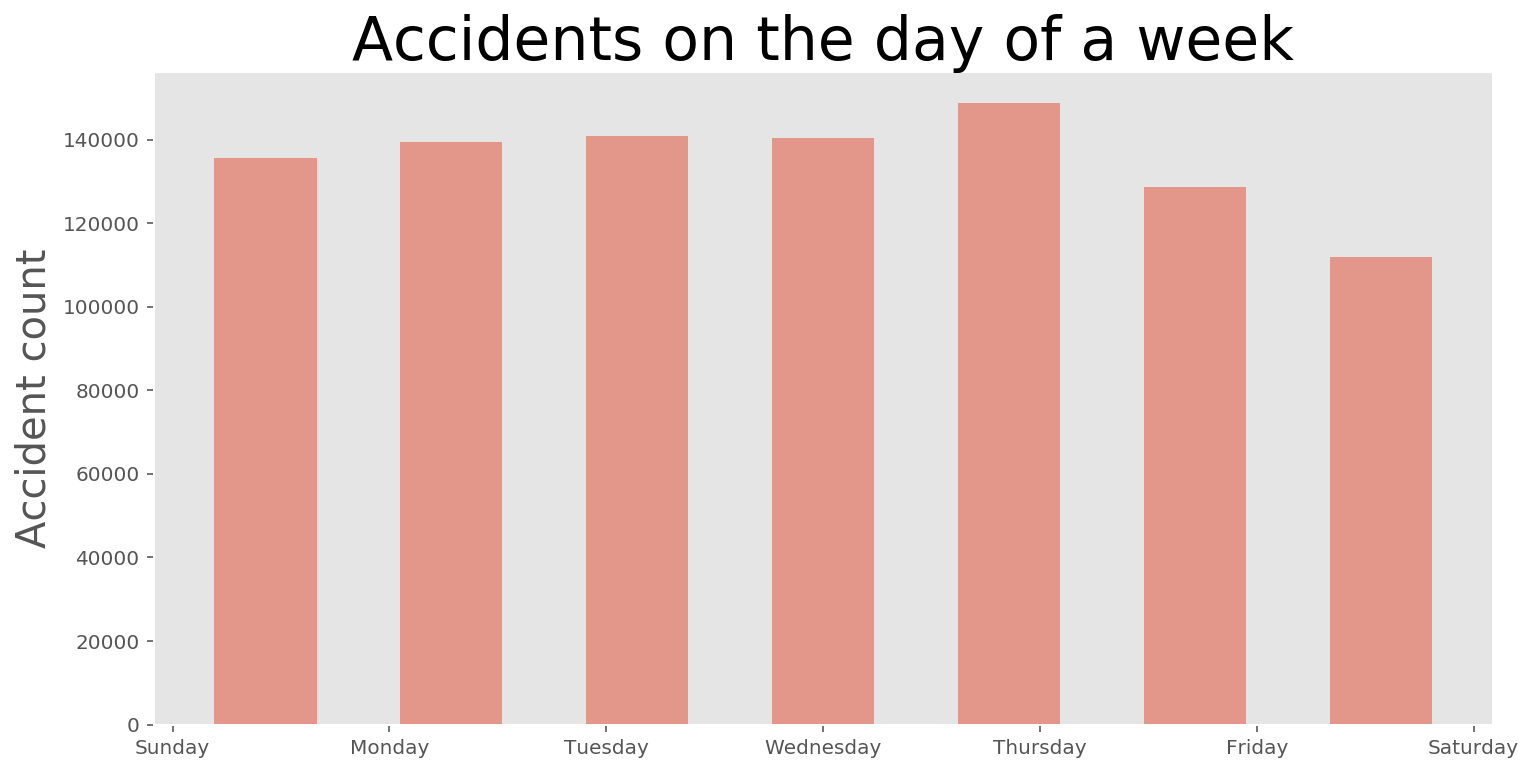

In [60]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5)
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
locs, labels = plt.xticks()
_,_ = plt.xticks(np.arange(7), ('Sunday', 'Monday' ,'Tuesday', 'Wednesday',  'Thursday',  'Friday', 'Saturday'))

We observed that that Thursday has highest accidents occurences during week now we will find time of accidents occurence


Text(0,0.5,'Accident count')

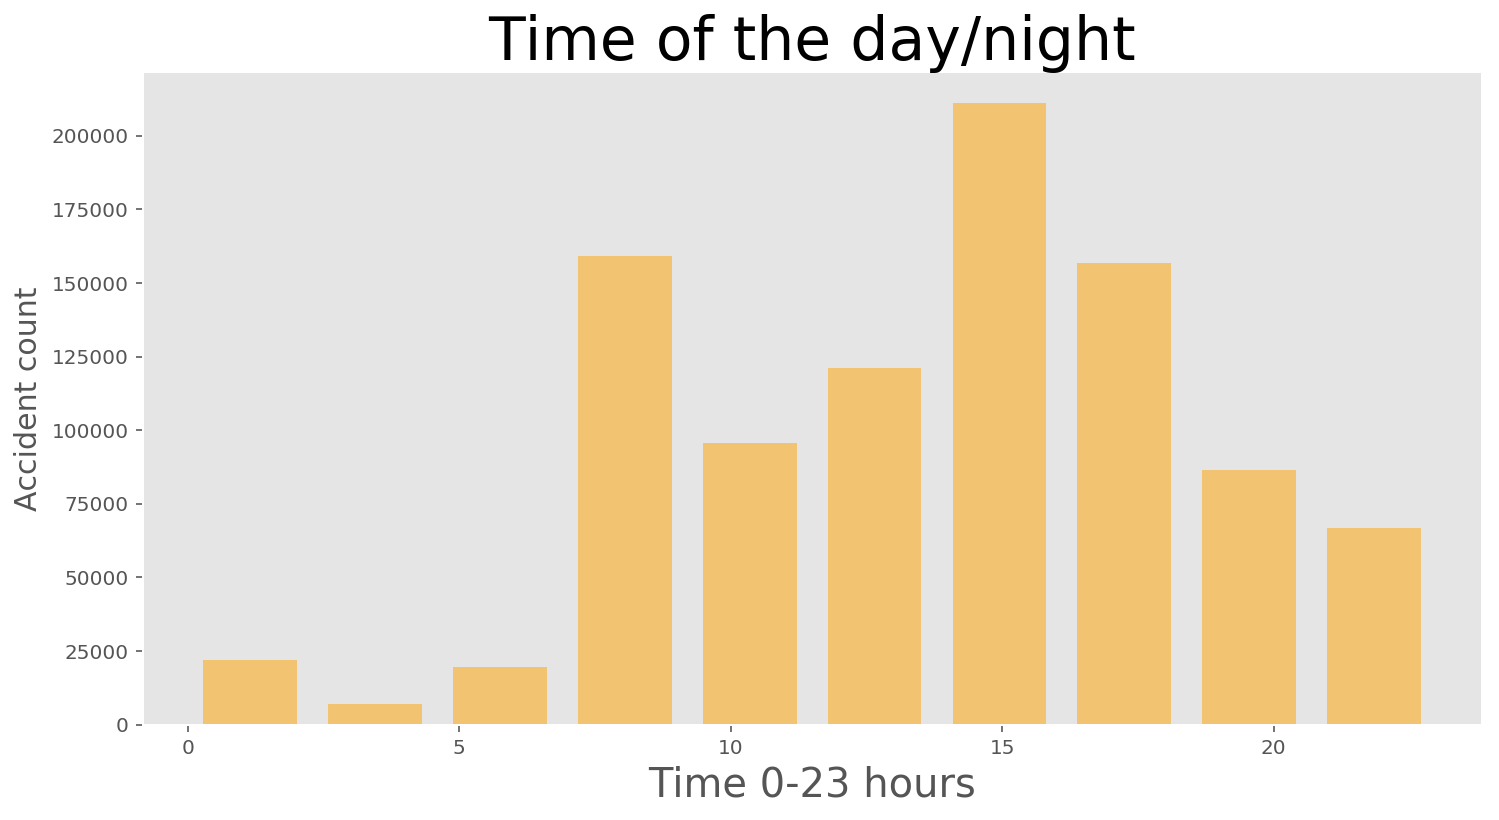

In [61]:
plt.figure(figsize=(12,6))
accidents.Date_time.dt.hour.hist(rwidth=0.75,alpha =0.50, color= 'orange')
plt.title('Time of the day/night',fontsize= 30)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 20)
plt.ylabel('Accident count' , fontsize = 15)

We observed that highest accidents occurences is during noon

We will start with finding age of driver involed in accidents 

Age column is grouped in 11 different bands

Text(0.5,0,'Age of Drivers')

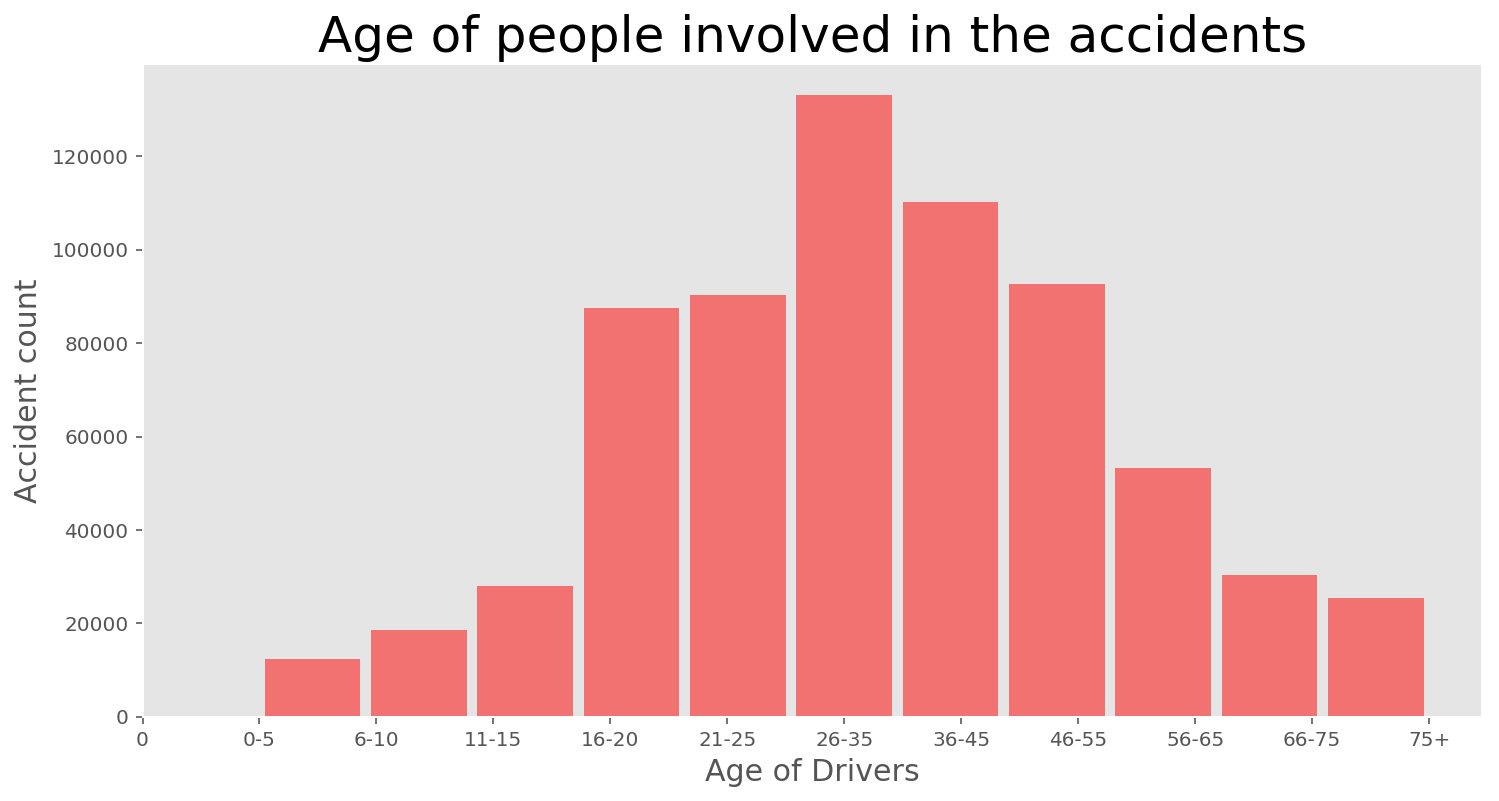

In [62]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
casualties.Age_Band_of_Casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'red',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

We observed that Age-Group 26-35 drivers are involved in accidents

Now we will performed logistic regression to predict accidents severity

we will use logistic regression for prediction

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
accidents.columns.values

array(['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference',
       'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propul

In [65]:
accident = accidents.drop('Accident_Severity' ,axis=1)
accident = accident[[ 'Age_of_Driver' ,
                     'Number_of_Vehicles', 
                     'Age_of_Vehicle',
                     'Day_of_Week' ,
                     'Road_Type',
                      'Weather_Conditions' , 
                     'Road_Surface_Conditions', 
                     'Light_Conditions', 
                    'Urban_or_Rural_Area',
                     'Speed_limit']]
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident.values, 
                                              accidents['Accident_Severity'].values,test_size=0.20)

In [70]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))


Accuracy 88.14
